In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, StringType
from graphframes import GraphFrame
import matplotlib.pyplot as plt
import networkx as nx
import os

In [2]:
# Initialize Spark session
# spark = SparkSession.builder \
#     .appName("FacebookGraphLinearSearchAndVisualization") \
#     .master("local[*]") \
#     .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
#     .getOrCreate()

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FacebookGraphLinearSearchAndVisualization") \
    .master("spark://10.58.0.158:7077") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()




C:\Users\ps232\AppData\Roaming\Python\Python38\site-packages\pyspark\sql\dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


Number of vertices: 4039
Number of edges: 88234
Neighbors of user 1911:
+----+----+
| src| dst|
+----+----+
| 107|1911|
|1008|1911|
|1047|1911|
|1077|1911|
|1110|1911|
|1123|1911|
|1124|1911|
|1150|1911|
|1161|1911|
|1214|1911|
|1230|1911|
|1283|1911|
|1321|1911|
|1327|1911|
|1337|1911|
|1352|1911|
|1361|1911|
|1419|1911|
|1437|1911|
|1440|1911|
+----+----+
only showing top 20 rows



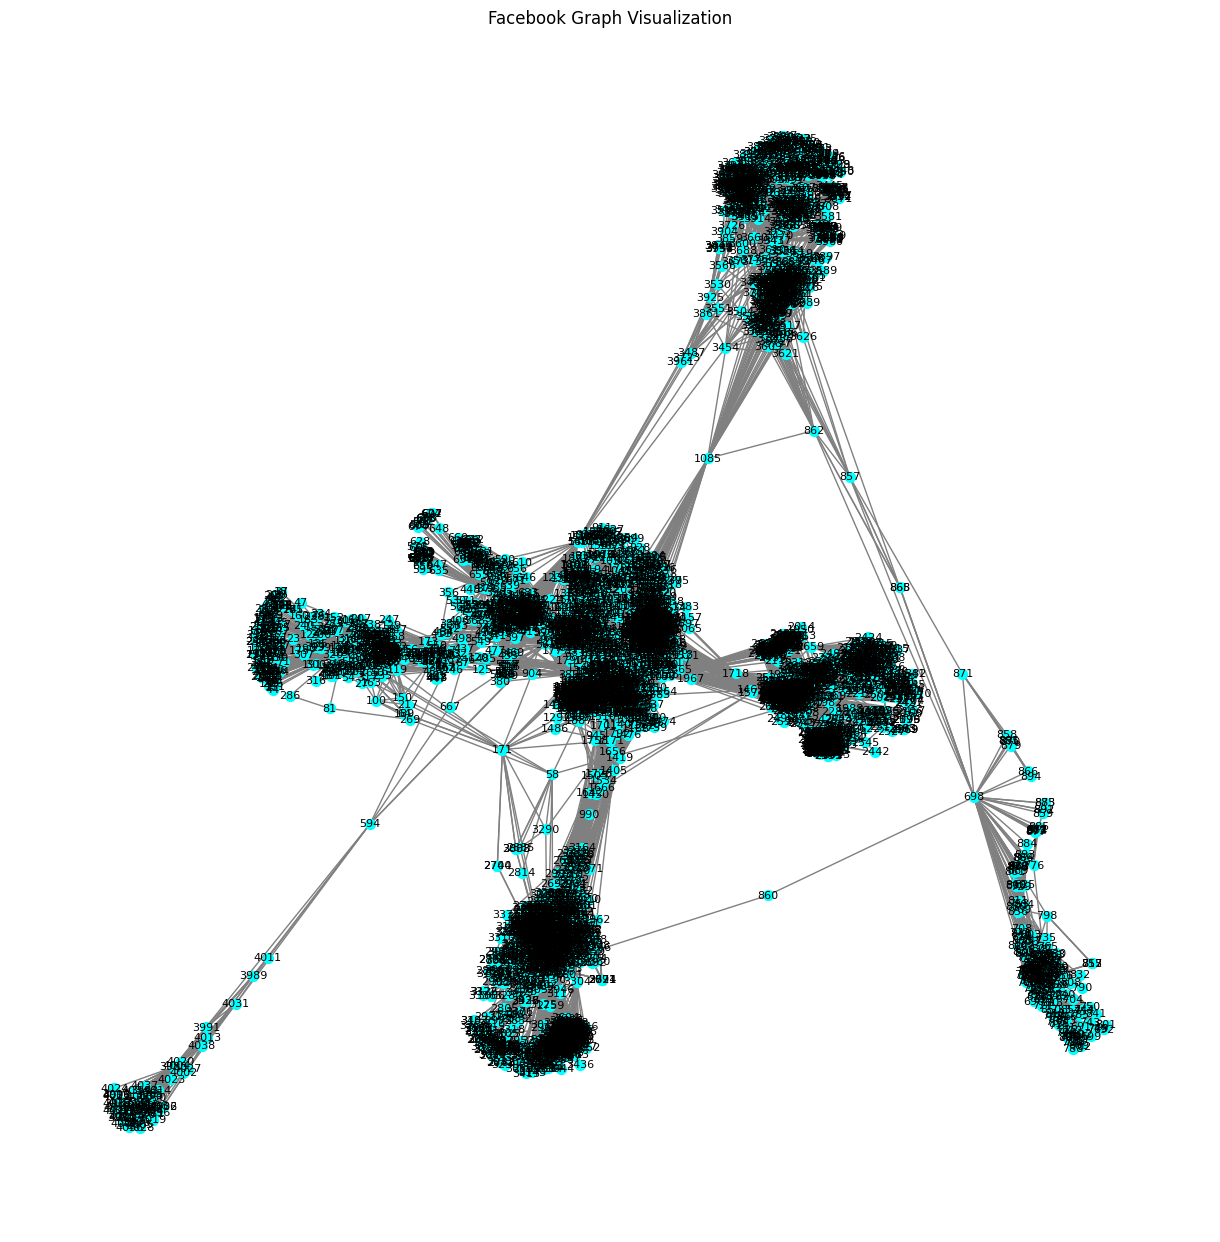

In [3]:
# Load the Facebook dataset (edges) from HDFS
path = "hdfs://hadoop-namenode:9820/project/facebook_combined.txt"  # Update with the actual HDFS path
def parse_line(line):
    parts = line.split(" ")
    if len(parts) == 2:
        return (parts[0], parts[1])
    else:
        return None

# Create RDD and filter out invalid lines
edges_rdd = spark.sparkContext.textFile(path) \
    .map(parse_line) \
    .filter(lambda x: x is not None)

# Define schema
schema = StructType([
    StructField("src", StringType(), True),
    StructField("dst", StringType(), True)
])

# Convert RDD to DataFrame using schema
edges_df = spark.createDataFrame(edges_rdd, schema=schema)

# Create vertices DataFrame
vertices_rdd = edges_rdd.flatMap(lambda row: [Row(id=row[0]), Row(id=row[1])]).distinct()
vertices_df = spark.createDataFrame(vertices_rdd, schema=StructType([StructField("id", StringType(), True)]))

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Basic graph operations
print(f"Number of vertices: {graph.vertices.count()}")
print(f"Number of edges: {graph.edges.count()}")

# Perform linear search for a specific user ID
target_user_id = "1911"  # Update with the user ID you want to search for
user_found = vertices_df.filter(vertices_df.id == target_user_id)

# Collect the search result
result = ""
if user_found.count() > 0:
    result = f"User ID {target_user_id} found in the dataset."
else:
    result = f"User ID {target_user_id} not found in the dataset."

# Write the result to an HDFS file
output_path = "hdfs://hadoop-namenode:9820/project/output.txt"  # Specify the HDFS output path
rdd = spark.sparkContext.parallelize([result])
rdd.saveAsTextFile(output_path)

# Find the neighbors of the specified user
neighbors = graph.edges.filter(f"src = '{target_user_id}' or dst = '{target_user_id}'")
print(f"Neighbors of user {target_user_id}:")
neighbors.show()

# Convert to NetworkX graph for visualization
nx_graph = nx.Graph()

# Add edges to NetworkX graph
for row in edges_df.collect():
    nx_graph.add_edge(row['src'], row['dst'])

# Plotting the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(nx_graph)  # positions for all nodes
nx.draw(nx_graph, pos, with_labels=True, node_size=50, font_size=8, font_color='black', node_color='cyan', edge_color='gray')
plt.title("Facebook Graph Visualization")
plt.show()

# Stop Spark session
spark.stop()


In [5]:
# Initialize Spark session
# spark = SparkSession.builder \
#     .appName("FacebookGraphLinearSearchAndVisualization") \
#     .master("local[*]") \
#     .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
#     .getOrCreate()

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FacebookGraphLinearSearchAndVisualization") \
    .master("spark://10.58.0.158:7077") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()

# Load the Facebook dataset (edges) from HDFS
path = "hdfs://hadoop-namenode:9820/project/facebook_combined.txt"  # Update with the actual HDFS path
def parse_line(line):
    parts = line.split(" ")
    if len(parts) == 2:
        return (parts[0], parts[1])
    else:
        return None

# Create RDD and filter out invalid lines
edges_rdd = spark.sparkContext.textFile(path) \
    .map(parse_line) \
    .filter(lambda x: x is not None)

# Define schema
schema = StructType([
    StructField("src", StringType(), True),
    StructField("dst", StringType(), True)
])

# Convert RDD to DataFrame using schema
edges_df = spark.createDataFrame(edges_rdd, schema=schema)

# Create vertices DataFrame
vertices_rdd = edges_rdd.flatMap(lambda row: [Row(id=row[0]), Row(id=row[1])]).distinct()
vertices_df = spark.createDataFrame(vertices_rdd, schema=StructType([StructField("id", StringType(), True)]))

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Basic graph operations
print(f"Number of vertices: {graph.vertices.count()}")
print(f"Number of edges: {graph.edges.count()}")

# Perform linear search for a specific user ID
target_user_id = "1911"  # Update with the user ID you want to search for
user_found = vertices_df.filter(vertices_df.id == target_user_id)

# Collect the search result
result = ""
if user_found.count() > 0:
    result = f"User ID {target_user_id} found in the dataset."
else:
    result = f"User ID {target_user_id} not found in the dataset."

# Write the result to an HDFS file
output_path = "hdfs://hadoop-namenode:9820/project/output2.txt"  # Specify the HDFS output path
rdd = spark.sparkContext.parallelize([result])
rdd.saveAsTextFile(output_path)

# Find the neighbors of the specified user
neighbors = graph.edges.filter(f"src = '{target_user_id}' or dst = '{target_user_id}'")
print(f"Neighbors of user {target_user_id}:")
neighbors.show()

# Stop Spark session
spark.stop()

Number of vertices: 4039
Number of edges: 88234
Neighbors of user 1911:
+----+----+
| src| dst|
+----+----+
| 107|1911|
|1008|1911|
|1047|1911|
|1077|1911|
|1110|1911|
|1123|1911|
|1124|1911|
|1150|1911|
|1161|1911|
|1214|1911|
|1230|1911|
|1283|1911|
|1321|1911|
|1327|1911|
|1337|1911|
|1352|1911|
|1361|1911|
|1419|1911|
|1437|1911|
|1440|1911|
+----+----+
only showing top 20 rows



In [26]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("FacebookGraphLinearSearchAndVisualization") \
    .master("local[*]") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()

# Initialize Spark session
# spark = SparkSession.builder \
#     .appName("FacebookGraphLinearSearchAndVisualization") \
#     .master("spark://10.58.0.158:7077") \
#     .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
#     .getOrCreate()

# Load the Facebook dataset (edges) from HDFS
path = "hdfs://hadoop-namenode:9820/project/facebook_combined.txt"  # Update with the actual HDFS path
def parse_line(line):
    parts = line.split(" ")
    if len(parts) == 2:
        return (parts[0], parts[1])
    else:
        return None

# Create RDD and filter out invalid lines
edges_rdd = spark.sparkContext.textFile(path) \
    .map(parse_line) \
    .filter(lambda x: x is not None)

# Define schema
schema = StructType([
    StructField("src", StringType(), True),
    StructField("dst", StringType(), True)
])

# Convert RDD to DataFrame using schema
edges_df = spark.createDataFrame(edges_rdd, schema=schema)

# Create vertices DataFrame
vertices_rdd = edges_rdd.flatMap(lambda row: [Row(id=row[0]), Row(id=row[1])]).distinct()
vertices_df = spark.createDataFrame(vertices_rdd, schema=StructType([StructField("id", StringType(), True)]))

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Basic graph operations
print(f"Number of vertices: {graph.vertices.count()}")
print(f"Number of edges: {graph.edges.count()}")

# Perform linear search for a specific user ID
target_user_id = "1911"  # Update with the user ID you want to search for
user_found = vertices_df.filter(vertices_df.id == target_user_id)

# Collect the search result
result = ""
if user_found.count() > 0:
    result = f"User ID {target_user_id} found in the dataset."
else:
    result = f"User ID {target_user_id} not found in the dataset."

# Write the result to an HDFS file
output_path = "hdfs://hadoop-namenode:9820/project/output.txt"  # Specify the HDFS output path
rdd = spark.sparkContext.parallelize([result])
rdd.saveAsTextFile(output_path)

# Find the neighbors of the specified user
neighbors = graph.edges.filter(f"src = '{target_user_id}' or dst = '{target_user_id}'")
print(f"Neighbors of user {target_user_id}:")
neighbors.show()

# Stop Spark session
spark.stop()

Py4JJavaError: An error occurred while calling o1048.defaultParallelism.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2702)
	at sun.reflect.GeneratedMethodAccessor89.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)


chuddi lag gyi

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, StringType
from graphframes import GraphFrame
from pyspark import TaskContext

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FacebookTesting") \
    .master("spark://10.58.0.158:7077") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()

# Load the Facebook dataset (edges) from HDFS
path = "hdfs://hadoop-namenode:9820/project/facebook_combined.txt"  # Update with the actual HDFS path

def parse_line(line):
    parts = line.split(" ")
    if len(parts) == 2:
        return (parts[0], parts[1])
    else:
        return None

# Create RDD and filter out invalid lines
edges_rdd = spark.sparkContext.textFile(path) \
    .map(parse_line) \
    .filter(lambda x: x is not None)

# Define schema
schema = StructType([
    StructField("src", StringType(), True),
    StructField("dst", StringType(), True)
])

# Convert RDD to DataFrame using schema
edges_df = spark.createDataFrame(edges_rdd, schema=schema)

# Create vertices DataFrame
vertices_rdd = edges_rdd.flatMap(lambda row: [Row(id=row[0]), Row(id=row[1])]).distinct()
vertices_df = spark.createDataFrame(vertices_rdd, schema=StructType([StructField("id", StringType(), True)]))

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Basic graph operations
print(f"Number of vertices: {graph.vertices.count()}")
print(f"Number of edges: {graph.edges.count()}")

# Metrics collection for executor contributions
executor_count = {}

def count_tasks(x):
    executor_id = TaskContext.get().getLocalProperty("spark.executor.id")
    if executor_id not in executor_count:
        executor_count[executor_id] = 0
    executor_count[executor_id] += 1
    return x  # Return the original value or any processed value

# Perform linear search for a specific user ID
target_user_id = "1911"  # Update with the user ID you want to search for
user_found = vertices_df.filter(vertices_df.id == target_user_id)

# Collect the search result
result = ""
if user_found.count() > 0:
    result = f"User ID {target_user_id} found in the dataset."
else:
    result = f"User ID {target_user_id} not found in the dataset."

# Write the result to an HDFS file
output_path = "hdfs://hadoop-namenode:9820/project/output5.txt"  # Specify the HDFS output path
rdd = spark.sparkContext.parallelize([result])
rdd.saveAsTextFile(output_path)

# Find the neighbors of the specified user
neighbors = graph.edges.filter(f"src = '{target_user_id}' or dst = '{target_user_id}'")
print(f"Neighbors of user {target_user_id}:")
neighbors.show()

# Count tasks processed by each executor
edges_rdd.foreach(count_tasks)

# Print executor contributions
print("Task contributions by executor:")
for executor, count in executor_count.items():
    print(f"Executor {executor} processed {count} tasks.")

# Stop Spark session
spark.stop()


Number of vertices: 4039
Number of edges: 88234
Neighbors of user 1911:
+----+----+
| src| dst|
+----+----+
| 107|1911|
|1008|1911|
|1047|1911|
|1077|1911|
|1110|1911|
|1123|1911|
|1124|1911|
|1150|1911|
|1161|1911|
|1214|1911|
|1230|1911|
|1283|1911|
|1321|1911|
|1327|1911|
|1337|1911|
|1352|1911|
|1361|1911|
|1419|1911|
|1437|1911|
|1440|1911|
+----+----+
only showing top 20 rows

Task contributions by executor:


In [16]:
executor_count

{}

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, StringType
from graphframes import GraphFrame
from pyspark import TaskContext

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FacebookGraphLinearSearchAndVisualization") \
    .master("spark://10.58.0.158:7077") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()

# Load the Facebook dataset (edges) from HDFS
path = "hdfs://hadoop-namenode:9820/project/facebook_combined.txt"  # Update with the actual HDFS path

def parse_line(line):
    parts = line.split(" ")
    if len(parts) == 2:
        return (parts[0], parts[1])
    else:
        return None

# Create RDD and filter out invalid lines
edges_rdd = spark.sparkContext.textFile(path) \
    .map(parse_line) \
    .filter(lambda x: x is not None)

# Define schema
schema = StructType([
    StructField("src", StringType(), True),
    StructField("dst", StringType(), True)
])

# Convert RDD to DataFrame using schema
edges_df = spark.createDataFrame(edges_rdd, schema=schema)

# Create vertices DataFrame
vertices_rdd = edges_rdd.flatMap(lambda row: [Row(id=row[0]), Row(id=row[1])]).distinct()
vertices_df = spark.createDataFrame(vertices_rdd, schema=StructType([StructField("id", StringType(), True)]))

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Basic graph operations
print(f"Number of vertices: {graph.vertices.count()}")
print(f"Number of edges: {graph.edges.count()}")

# Metrics collection for executor contributions
executor_count = {}

def count_tasks(x):
    executor_id = TaskContext.get().getLocalProperty("spark.executor.id")
    if executor_id not in executor_count:
        executor_count[executor_id] = 0
    executor_count[executor_id] += 1
    return x  # Return the original value or any processed value

# Perform linear search for a specific user ID
target_user_id = "1911"  # Update with the user ID you want to search for
user_found = vertices_df.filter(vertices_df.id == target_user_id)

# Collect the search result
result = ""
if user_found.count() > 0:
    result = f"User ID {target_user_id} found in the dataset."
else:
    result = f"User ID {target_user_id} not found in the dataset."

# Write the result to an HDFS file
output_path = "hdfs://hadoop-namenode:9820/project/output2.txt"  # Specify the HDFS output path
rdd = spark.sparkContext.parallelize([result])
rdd.saveAsTextFile(output_path)

# Find the neighbors of the specified user
neighbors = graph.edges.filter(f"src = '{target_user_id}' or dst = '{target_user_id}'")
print(f"Neighbors of user {target_user_id}:")
neighbors.show()

# Count tasks processed by each executor
edges_rdd.foreach(count_tasks)

# Collect executor contributions to driver
executor_contributions = spark.sparkContext.parallelize(list(executor_count.items()))
executor_contributions.foreach(lambda x: print(f"Executor {x[0]} processed {x[1]} tasks."))

# Stop Spark session
spark.stop()


Number of vertices: 4039
Number of edges: 88234
Neighbors of user 1911:
+----+----+
| src| dst|
+----+----+
| 107|1911|
|1008|1911|
|1047|1911|
|1077|1911|
|1110|1911|
|1123|1911|
|1124|1911|
|1150|1911|
|1161|1911|
|1214|1911|
|1230|1911|
|1283|1911|
|1321|1911|
|1327|1911|
|1337|1911|
|1352|1911|
|1361|1911|
|1419|1911|
|1437|1911|
|1440|1911|
+----+----+
only showing top 20 rows



In [18]:
executor_contributions

ParallelCollectionRDD[36] at readRDDFromFile at PythonRDD.scala:289

In [21]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.types import StructType, StructField, StringType
from graphframes import GraphFrame
from pyspark import TaskContext

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FacebookTesting3") \
    .master("spark://10.58.0.158:7077") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()

# Load the Facebook dataset (edges) from HDFS
path = "hdfs://hadoop-namenode:9820/project/facebook_combined.txt"  # Update with the actual HDFS path

def parse_line(line):
    parts = line.split(" ")
    if len(parts) == 2:
        return (parts[0], parts[1])
    else:
        return None

# Create RDD and filter out invalid lines
edges_rdd = spark.sparkContext.textFile(path) \
    .map(parse_line) \
    .filter(lambda x: x is not None)

# Define schema
schema = StructType([
    StructField("src", StringType(), True),
    StructField("dst", StringType(), True)
])

# Convert RDD to DataFrame using schema
edges_df = spark.createDataFrame(edges_rdd, schema=schema)

# Create vertices DataFrame
vertices_rdd = edges_rdd.flatMap(lambda row: [Row(id=row[0]), Row(id=row[1])]).distinct()
vertices_df = spark.createDataFrame(vertices_rdd, schema=StructType([StructField("id", StringType(), True)]))

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Basic graph operations
print(f"Number of vertices: {graph.vertices.count()}")
print(f"Number of edges: {graph.edges.count()}")

# Accumulators to track task counts per executor
executor_task_counts = {}

def init_accumulator(executor_id):
    """Helper function to initialize accumulator if not present."""
    if executor_id not in executor_task_counts:
        executor_task_counts[executor_id] = spark.sparkContext.accumulator(0)

def count_tasks(x):
    """Function to count tasks in each executor."""
    executor_id = TaskContext.get().executorId()
    init_accumulator(executor_id)
    executor_task_counts[executor_id] += 1
    return x  # Return the original value

# Perform linear search for a specific user ID
target_user_id = "1911"  # Update with the user ID you want to search for
user_found = vertices_df.filter(vertices_df.id == target_user_id)

# Collect the search result
result = ""
if user_found.count() > 0:
    result = f"User ID {target_user_id} found in the dataset."
else:
    result = f"User ID {target_user_id} not found in the dataset."

# Write the result to an HDFS file
output_path = "hdfs://hadoop-namenode:9820/project/output7.txt"  # Specify the HDFS output path
rdd = spark.sparkContext.parallelize([result])
rdd.saveAsTextFile(output_path)

# Find the neighbors of the specified user
neighbors = graph.edges.filter(f"src = '{target_user_id}' or dst = '{target_user_id}'")
print(f"Neighbors of user {target_user_id}:")
neighbors.show()

# Count tasks processed by each executor
edges_rdd.foreach(count_tasks)

# Collecting task contributions from executors
executor_task_contributions = {executor: acc.value for executor, acc in executor_task_counts.items()}

# Print executor contributions
print("Task contributions by executor:")
for executor, count in executor_task_contributions.items():
    print(f"Executor {executor} processed {count} tasks.")

# Stop Spark session
spark.stop()


Py4JJavaError: An error occurred while calling o1028.defaultParallelism.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2702)
	at sun.reflect.GeneratedMethodAccessor89.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)
